In [42]:
import pandas as pa
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [43]:
cols = ['FEBRE','TOSSE','GARGANTA','DISPNEIA','DESC_RESP','SATURACAO','DIARREIA','VOMITO',
       'HEMATOLOGI','ASMA','DIABETES','IMUNODEPRE','RENAL','OBESIDADE','CLASSI_FIN']

#cols = [item.lower() for item in cols]

df = pa.read_csv('gripe_2019.csv', engine='python',sep=';',usecols=cols).loc[0:3000]

In [44]:
df['PUERPERA'].fillna(value=2, inplace=True)
df['DIARREIA'].fillna(value=2, inplace=True)
df['DIABETES'].fillna(value=2, inplace=True)
df['PNEUMOPATI'].fillna(value=2, inplace=True)
df['CS_SEXO'].replace({"M": 0, "F": 1, "I":-1}, inplace=True)
df['OBESIDADE'].fillna(value=2, inplace=True)
df['NEUROLOGIC'].fillna(value=2, inplace=True)
df['ASMA'].fillna(value=2, inplace=True)
df['HEPATICA'].fillna(value=2, inplace=True)
df['SATURACAO'].fillna(value=2, inplace=True)
df['CARDIOPATI'].fillna(value=2, inplace=True)
df['FEBRE'].fillna(value=2, inplace=True)
df['IMUNODEPRE'].fillna(value=2, inplace=True)
df['RENAL'].fillna(value=2, inplace=True)
df['DISPNEIA'].fillna(value=2, inplace=True)
df['DESC_RESP'].fillna(value=2, inplace=True)
df['SIND_DOWN'].fillna(value=2, inplace=True)
df['HEMATOLOGI'].fillna(value=2, inplace=True)
df['TOSSE'].fillna(value=2, inplace=True)
df['GARGANTA'].fillna(value=2, inplace=True)
df['VOMITO'].fillna(value=2, inplace=True)
df['CLASSI_FIN'].fillna(value=0, inplace=True)


pa.to_numeric(df['CS_SEXO'])

df

,CS_SEXO,TP_IDADE,FEBRE,TOSSE,GARGANTA,DISPNEIA,DESC_RESP,SATURACAO,DIARREIA,VOMITO,...,SIND_DOWN,HEPATICA,ASMA,DIABETES,NEUROLOGIC,PNEUMOPATI,IMUNODEPRE,RENAL,OBESIDADE,CLASSI_FIN
0,0,3,1.0,1.0,2.0,1.0,1.0,1.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,4.0
1,1,2,1.0,1.0,2.0,1.0,1.0,1.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,4.0
2,0,3,1.0,1.0,2.0,1.0,1.0,1.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,4.0
3,1,2,1.0,1.0,9.0,1.0,1.0,1.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
4,1,2,1.0,2.0,2.0,1.0,1.0,1.0,9.0,9.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2996,1,2,1.0,1.0,2.0,1.0,1.0,2.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
2997,0,2,1.0,1.0,2.0,1.0,1.0,1.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
2998,0,2,1.0,1.0,2.0,1.0,1.0,2.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,4.0
2999,1,3,1.0,2.0,1.0,1.0,1.0,2.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,4.0


In [45]:
#df.isnull().sum()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3001 entries, 0 to 3000
Data columns (total 23 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   CS_SEXO     3001 non-null   int64  
 1   TP_IDADE    3001 non-null   int64  
 2   FEBRE       3001 non-null   float64
 3   TOSSE       3001 non-null   float64
 4   GARGANTA    3001 non-null   float64
 5   DISPNEIA    3001 non-null   float64
 6   DESC_RESP   3001 non-null   float64
 7   SATURACAO   3001 non-null   float64
 8   DIARREIA    3001 non-null   float64
 9   VOMITO      3001 non-null   float64
 10  PUERPERA    3001 non-null   float64
 11  CARDIOPATI  3001 non-null   float64
 12  HEMATOLOGI  3001 non-null   float64
 13  SIND_DOWN   3001 non-null   float64
 14  HEPATICA    3001 non-null   float64
 15  ASMA        3001 non-null   float64
 16  DIABETES    3001 non-null   float64
 17  NEUROLOGIC  3001 non-null   float64
 18  PNEUMOPATI  3001 non-null   float64
 19  IMUNODEPRE  3001 non-null  

In [46]:
kmeans = KMeans(n_clusters=3, random_state=0)

In [47]:
y_teste = kmeans.fit(df)
y_teste.labels_

array([0, 0, 0, ..., 0, 0, 0])

In [48]:
df['Kclasses']=y_teste.labels_.tolist()

In [49]:
df['Kclasses']

0       0
1       0
2       0
3       2
4       1
       ..
2996    0
2997    0
2998    0
2999    0
3000    0
Name: Kclasses, Length: 3001, dtype: int64

In [50]:
correlation = df.corr()
correlation

,CS_SEXO,TP_IDADE,FEBRE,TOSSE,GARGANTA,DISPNEIA,DESC_RESP,SATURACAO,DIARREIA,VOMITO,...,HEPATICA,ASMA,DIABETES,NEUROLOGIC,PNEUMOPATI,IMUNODEPRE,RENAL,OBESIDADE,CLASSI_FIN,Kclasses
CS_SEXO,1.000000,0.088684,0.049811,-0.008616,-0.048819,0.027366,-0.016158,0.005956,0.006467,-0.009069,...,0.028580,0.041629,-0.015930,0.024652,-0.001540,0.003823,0.022253,0.018212,-0.008079,-0.051485
TP_IDADE,0.088684,1.000000,0.047731,0.052928,-0.184746,0.041236,0.014360,-0.016698,0.035392,0.035869,...,0.016786,-0.030369,-0.071827,-0.034275,-0.044907,-0.034442,-0.005320,0.012533,0.129928,-0.130897
FEBRE,0.049811,0.047731,1.000000,0.050505,0.057694,0.034592,0.009309,-0.042907,0.057050,0.054738,...,0.193708,0.021642,-0.046606,0.157270,-0.060341,-0.010196,-0.020813,-0.006941,0.063859,0.045754
TOSSE,-0.008616,0.052928,0.050505,1.000000,0.101099,0.010255,-0.002141,-0.039259,0.147735,0.109367,...,-0.003358,-0.007837,-0.012588,-0.012092,-0.010804,-0.012737,-0.007469,0.001226,0.051808,0.066013
GARGANTA,-0.048819,-0.184746,0.057694,0.101099,1.000000,-0.067079,0.050791,0.046954,0.183474,0.150895,...,0.020538,0.039648,0.039619,0.054549,0.036770,0.058624,0.036845,0.027802,-0.014423,0.893858
DISPNEIA,0.027366,0.041236,0.034592,0.010255,-0.067079,1.000000,0.030983,0.058858,0.035488,-0.005315,...,-0.011391,-0.019418,-0.032259,-0.015043,0.000691,-0.019700,-0.007425,-0.002588,-0.042467,-0.062992
DESC_RESP,-0.016158,0.014360,0.009309,-0.002141,0.050791,0.030983,1.000000,0.203880,0.138143,0.153011,...,-0.006634,0.000293,0.001914,-0.005536,-0.022813,-0.000477,-0.006496,-0.016778,0.037114,0.062486
SATURACAO,0.005956,-0.016698,-0.042907,-0.039259,0.046954,0.058858,0.203880,1.000000,0.104851,0.098616,...,-0.013637,-0.008999,-0.032939,0.003177,-0.015723,0.040878,-0.012382,-0.004572,0.035415,0.079708
DIARREIA,0.006467,0.035392,0.057050,0.147735,0.183474,0.035488,0.138143,0.104851,1.000000,0.840993,...,0.035174,0.132565,0.080812,0.046092,0.038810,0.068259,0.131484,0.035709,0.042044,0.354401
VOMITO,-0.009069,0.035869,0.054738,0.109367,0.150895,-0.005315,0.153011,0.098616,0.840993,1.000000,...,0.034550,0.075764,0.057788,0.009977,0.023098,0.031551,0.035572,0.035879,0.052240,0.344049


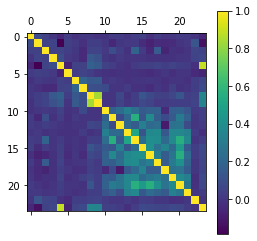

In [51]:
correlation_frame = df.corr(method='pearson')
plt.matshow(correlation_frame)
plt.colorbar()
plt.show()